## Modeling Notes

- K-means
    - unsupervised
    - groups a dataset into *k* clusters
    - k is specified
    - clusters won't have the same number of points
    - Pros
        - fast
        - clusters, in centroids, are v. interpretable
        - most common clustering algo
    - Cons
        - data must be scaled before clustering
        - dimensionality (more predictors) is an issue
        - sensitive to outliers (binary can be an outlier if all others are scaled)
    - Algorithms
        - start with data
        - randomly choose k points in the X (data) space
        - calculate distance from every point in X to each centroid
        - assign each point to the closest centroid
        - *start with k=2*

## Exercises

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from sklearn.cluster import KMeans

np.random.seed(4)

import acquire
import wrangle

import sklearn
from sklearn.datasets import load_iris


#### 1. Clustering with the Iris Dataset

Using this lesson as a guide, perform clustering on the iris dataset.

a. Choose features other than the ones used in the lesson.

In [2]:
iris = acquire.get_iris_db()
iris = iris.drop(columns='measurement_id')
iris.head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2


In [3]:
# Pick the features to use for clustering
X = iris[["petal_width", "sepal_width"]]

In [4]:
#set the parameters: number of clusters:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X) #fit on the features defined in X
#this outputs the predictions in an array. each number is the pred cluster
kmeans.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [5]:
iris['cluster_prediction'] = kmeans.predict(X)
iris.sample(20)

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width,cluster_prediction
11,1,setosa,4.8,3.4,1.6,0.2,1
100,3,virginica,6.3,3.3,6.0,2.5,0
47,1,setosa,4.6,3.2,1.4,0.2,1
6,1,setosa,4.6,3.4,1.4,0.3,1
56,2,versicolor,6.3,3.3,4.7,1.6,0
...,...,...,...,...,...,...,...
54,2,versicolor,6.5,2.8,4.6,1.5,2
39,1,setosa,5.1,3.4,1.5,0.2,1
58,2,versicolor,6.6,2.9,4.6,1.3,2
81,2,versicolor,5.5,2.4,3.7,1.0,2


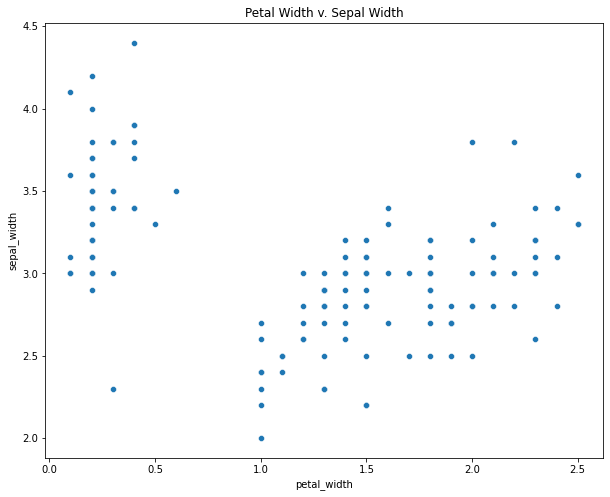

In [6]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=iris, x='petal_width', y='sepal_width')
plt.title("Petal Width v. Sepal Width")
plt.show()

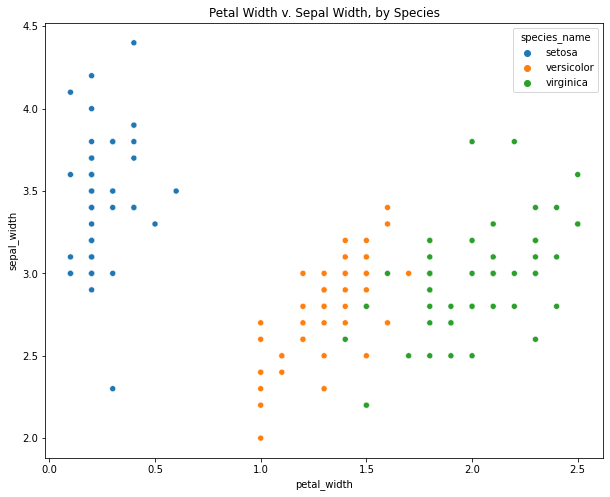

In [7]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=iris, x='petal_width', y='sepal_width', hue='species_name')
plt.title("Petal Width v. Sepal Width, by Species")
plt.show()

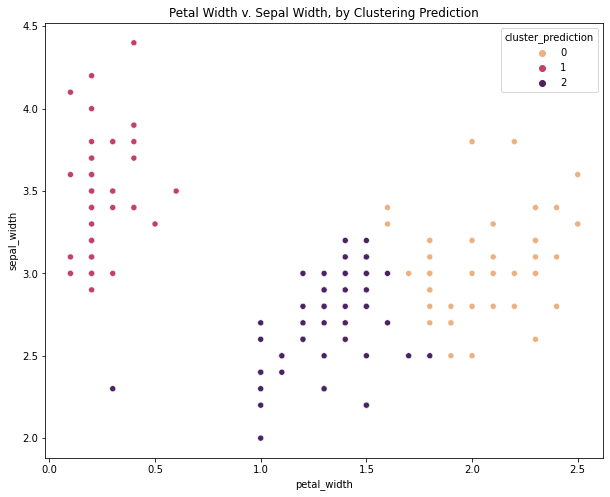

In [8]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=iris, x='petal_width', y='sepal_width', hue='cluster_prediction', palette='flare')
plt.title("Petal Width v. Sepal Width, by Clustering Prediction")
plt.show()

b. Visualize the results of your clustering.

In [9]:
kmeans.cluster_centers_

array([[2.05208333, 3.04166667],
       [0.24489796, 3.45102041],
       [1.30943396, 2.70754717]])

In [10]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

,petal_width,sepal_width
0,2.052083,3.041667
1,0.244898,3.451020
2,1.309434,2.707547


In [11]:
iris.groupby('cluster_prediction')['petal_width','sepal_width'].mean()

,petal_width,sepal_width
cluster_prediction,,
0,2.052083,3.041667
1,0.244898,3.451020
2,1.309434,2.707547


Text(0.5, 1.0, 'Visualizing Cluster Centers')

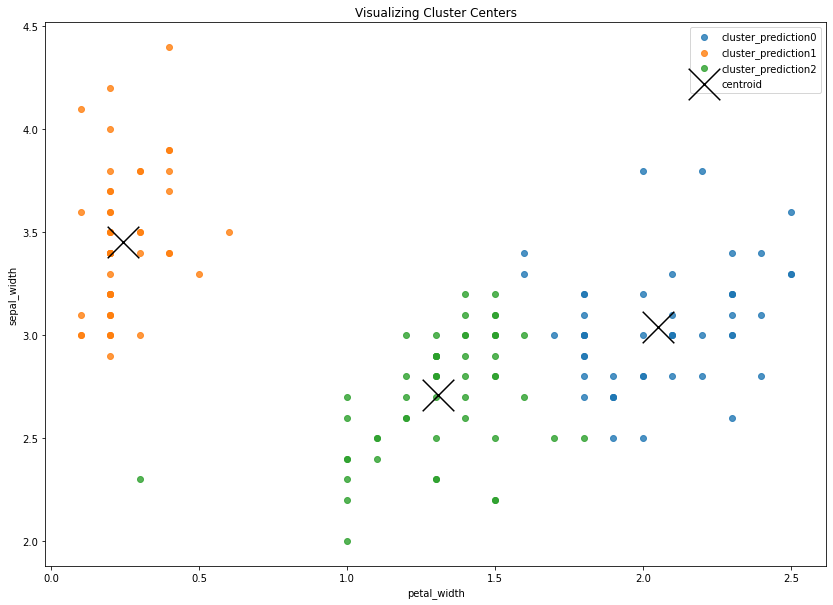

In [12]:
plt.figure(figsize=(14,10))
for cluster_prediction, subset in iris.groupby('cluster_prediction'):
    plt.scatter(subset.petal_width, subset.sepal_width, label='cluster_prediction' + str(cluster_prediction), alpha=0.8)

centroids.plot.scatter(x='petal_width', y='sepal_width', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')
plt.legend()
plt.xlabel('petal_width')
plt.ylabel('sepal_width')
plt.title('Visualizing Cluster Centers')

c. Use the elbow method to visually select a good value for k.

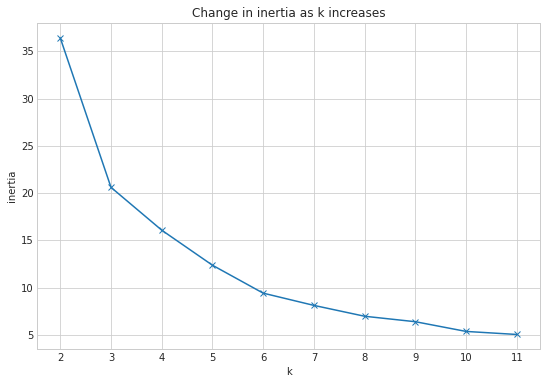

In [13]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')


In [49]:
# seems like 3 or 4 is ideal

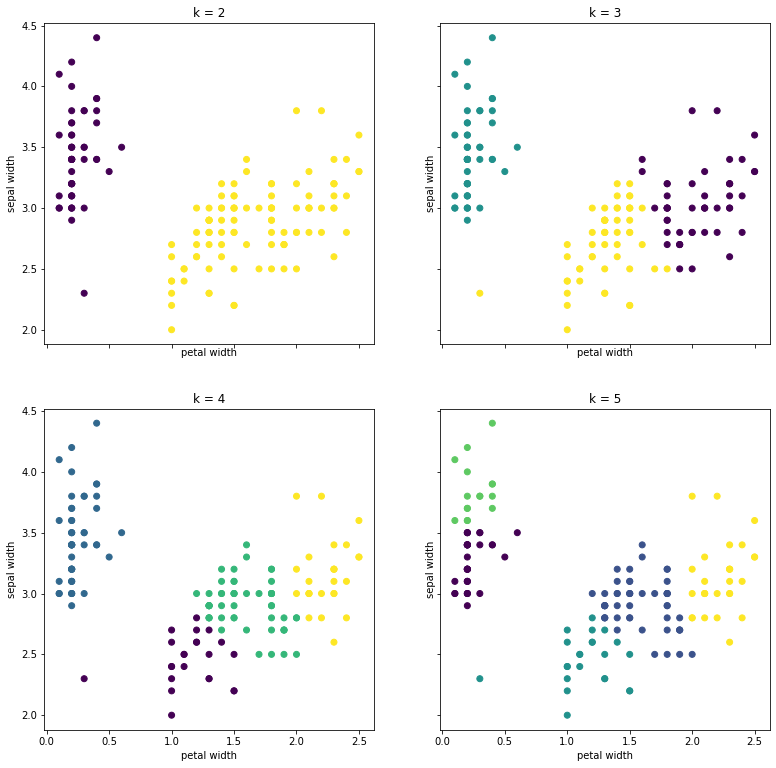

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)
# adding ax to the for loop builds that number of subplots
for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.petal_width, X.sepal_width, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='petal width', ylabel='sepal width')


d. Repeat the clustering, this time with 3 different features.

In [15]:
# Pick the features to use for clustering *petal width, length, sepal width
X = iris[["petal_width", "sepal_width", "petal_length"]]

In [16]:
#set the parameters: number of clusters:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X) #fit on the features defined in X
#this outputs the predictions in an array. each number is the pred cluster
kmeans.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

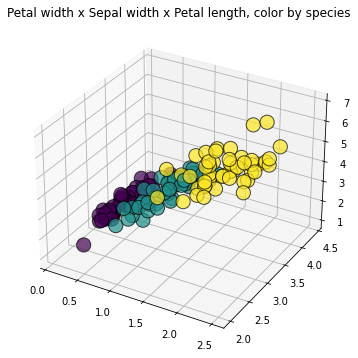

In [17]:
# 3D figure, plotted with Species as color

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

x = X.petal_width
y = X.sepal_width
z = X.petal_length

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
#map because the color argument will not take strings, only numbers.
iris.species_name = iris.species_name.map({'setosa': 1, 'versicolor': 2, 'virginica': 3})
ax.scatter(x, y, z,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c=iris.species_name)
plt.title("Petal width x Sepal width x Petal length, color by species")
plt.show()

In [18]:
iris.head(1)

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width,cluster_prediction
0,1,1,5.1,3.5,1.4,0.2,1


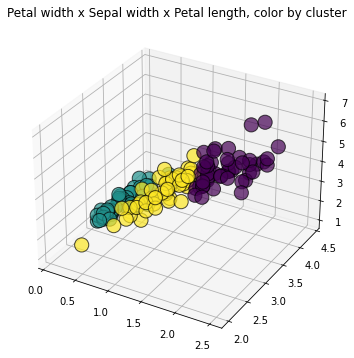

In [19]:
# 3D figure, by cluster

x = X.petal_width
y = X.sepal_width
z = X.petal_length

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
#map because the color argument will not take strings, only numbers.
#iris.species_name = iris.species_name.map({'setosa': 1, 'versicolor': 2, 'virginica': 3})
ax.scatter(x, y, z,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c=iris.cluster_prediction)
plt.title("Petal width x Sepal width x Petal length, color by cluster")
plt.show()

b. Visualize the results of your clustering.

In [20]:
kmeans.cluster_centers_

array([[1.3509434 , 2.75471698, 4.28113208],
       [0.246     , 3.428     , 1.462     ],
       [2.04255319, 3.00425532, 5.6106383 ]])

In [21]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

,petal_width,sepal_width,petal_length
0,1.350943,2.754717,4.281132
1,0.246000,3.428000,1.462000
2,2.042553,3.004255,5.610638


In [22]:
iris.groupby('cluster_prediction')['petal_width','sepal_width','petal_length'].mean()

,petal_width,sepal_width,petal_length
cluster_prediction,,,
0,2.052083,3.041667,5.516667
1,0.244898,3.451020,1.465306
2,1.309434,2.707547,4.284906


c. Use the elbow method to visually select a good value for k.

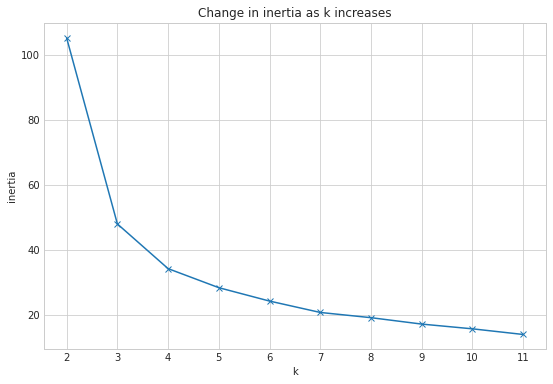

In [23]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')


In [24]:
# 4 features seems to be ideal

## 2. Mall Customer Dataset

In [25]:
df = wrangle.get_mall_customers()
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [35]:
df.dtypes

customer_id        int64
gender            object
age                int64
annual_income      int64
spending_score     int64
dtype: object

In [36]:
def one_hot_encode(df):
    dummies_list = df.select_dtypes('object').columns
    dummy_df = pd.get_dummies(df[dummies_list], dummy_na = False, drop_first=True)
    #concatenate the two dataframes
    df = pd.concat([df, dummy_df], axis=1)
    #rename the encoded df
    encoded_df = df.drop(columns=dummies_list)
    #return the encoded df
    return encoded_df

In [44]:
encoded_mall_customers = one_hot_encode(df)

encoded_mall_customers.head()

,customer_id,age,annual_income,spending_score,gender_Male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0


In [45]:
encoded_mall_customers = encoded_mall_customers.drop(columns='customer_id')

encoded_mall_customers.head()

,age,annual_income,spending_score,gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [51]:
import split

In [52]:
train, validate, test = split.train_validate_test_split(encoded_mall_customers, 'spending_score')
train.shape

(112, 4)

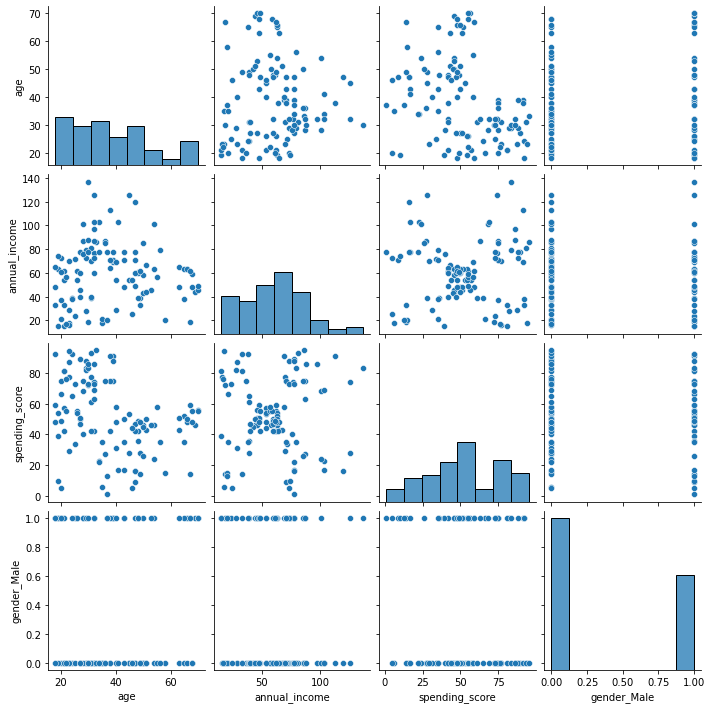

In [53]:
sns.pairplot(train)
plt.show()

In [ ]:
# look for clusters in the data, to use as features
# drop gender, doesn't lead to clustering takeways

### b. Choose features.

In [54]:
X = encoded_mall_customers[['age', 'annual_income', 'spending_score']]

In [55]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
kmeans.predict(X)

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4,
       3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 3, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [57]:
encoded_mall_customers['cluster'] = kmeans.predict(X)

In [58]:
encoded_mall_customers.head()

,age,annual_income,spending_score,gender_Male,cluster
0,19,15,39,1,0
1,21,15,81,1,4
2,20,16,6,0,0
3,23,16,77,0,4
4,31,17,40,0,0


In [59]:
X.columns

Index(['age', 'annual_income', 'spending_score'], dtype='object')

In [ ]:
cluster_hues = ['species']

for x in cluster_hues:
    